# Digital Health Publications and Clinical Trials Analysis Scripts
## For any questions, please contact the corresponding author of the publication
==============================================================================================

### Files needed to be placed in the datapath folder specified below include:
- Manually created file of all NIH publications per year.
    - filename labeled here as: allNih-publications-Summary.xlsx.  Ths is in the github folder.
    - this was created using the iSearch Publications Module Facets view and copying and pasting the # of publications displayed per year.
    - note: any year can have more publications added at any time as more publications are attributed to grants and loaded into Pubmed
- Publications portfolios  (2 files) downloaded from iSearch Publications Module: https://itools.od.nih.gov/isearch/publications/
    - filename labeled here as: DHT8-iSearch_-_Publications-export_2024-05-29-10-56-18.xlsx (this one is all DHT pubs across HHS)
        - link to search here: https://itools.od.nih.gov/isearch/publications/#search:searchId=66570bdd0f1080302be7a9ae [NIH access only] (note, this will have different N's as the search is updated.  To get the exact data request the excel or access the the iSearch Portfolio)
        - note, we say all HHS because most publications do not have a grant cited
    - filename labeled here as: allTR-iSearch_-_Publications-export_2024-05-29-14-05-53.xlsx (this is only NCATS aka "TR" publications)
- Clinical Trials portfolios  (2 files) downloaded from iSearch Clinical Trials Module: https://itools.od.nih.gov/isearch/clinical/
    - filename labeled here as: allNIH-iSearch_-_Clinical_Trials-export_2024-05-29-11-20-19.xlsx (this is all clinical trials)
    - filename labeled here as: DHT8-iSearch_-_Clinical_Trials-export_2024-05-29-11-18-20.xlsx (this is all clin trials matching DHT search terms)
        - link to search: https://itools.od.nih.gov/isearch/clinical/#search:searchId=66b354270f1080302be8d219 (see publications note above) 

### Search Terms: "decentralized trial",  "remote trial", "virtual trial", "digital health", "digital health technology", "digital health technologies", "mobile app", "mobile application", "mobile health", "mobile health technology", "mobile health technologies", mhealth, "smart connected health", "remote patient monitoring", "connected home health", "wearable device", wearable, accelerometer, accelerometry, actigraph, actigraphy, "remote healthcare delivery", "virtual care", "digital patient engagement", telehealth, telemedicine. 

In [110]:
datapath='C:\\Users\\radmantc\\Documents\\Digital Health Portfolio Analysis\\MasterData\\'#source data downloaded from iSearch

outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\'

import os
try:
    os.mkdir(outpath + '\\..\\')
except OSError as error:
    print(error) 
try:
    os.mkdir(outpath)
except OSError as error:
    print(error)  
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\\\..\\'
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\'


<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\3102697553.py:3: SyntaxWarning: invalid escape sequence '\O'
  outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\'


In [111]:
df_allPub = pd.read_excel(datapath + 'allNih-publications-Summary.xlsx') 
df_allPub

,year,pubs
0,2023,1535864
1,2022,1578145
2,2021,1557876
3,2020,1404604
4,2019,1228318
5,2018,1173100
6,2017,1128044
7,2016,1116475
8,2015,1091958


In [112]:
#load iSearch/publications search of same terms USED FOR GRANTS SEARCH...THESE ARE THE DHT PUBS ACROSS ALL NIH:
df_iPub = pd.read_excel(datapath + 'DHT8-iSearch_-_Publications-export_2024-05-29-10-56-18.xlsx')

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [113]:
#same as above, but only for NCATS publications
df_allPubTR = pd.read_excel(datapath + 'allTR-iSearch_-_Publications-export_2024-05-29-14-05-53.xlsx')

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [114]:
#remove extra years:
endyear=2023
df_iPub=df_iPub[(df_iPub['Pub Year']>=2015) & (df_iPub['Pub Year']<=endyear) ]
df_allPubTR=df_allPubTR[(df_allPubTR['Pub Year']>=2015) & (df_allPubTR['Pub Year']<=endyear) ]
print('% DHT out of all NIH publications: ' , df_iPub.shape[0]/df_allPub.pubs.sum()*100 )

% DHT out of all NIH publications:  0.6940691956516735


# Supplemental Table 15
## 	Number of Unique Journals from DHT Publication PER Fiscal Year


In [115]:
#question: are there more publishing opportunities for DHTs per year?
print( len(df_iPub['Journal Name'].unique() ) )
yrs = np.sort(df_iPub['Pub Year'].unique() )
for yr in yrs:
    cdf = df_iPub[df_iPub['Pub Year']==yr]
    print('Year: ', yr, ', # Unique Journals: ',len(cdf['Journal Name'].unique()),' of ' ,cdf.shape[0] , ' publications')

5708
Year:  2015 , # Unique Journals:  1220  of  3714  publications
Year:  2016 , # Unique Journals:  1408  of  4423  publications
Year:  2017 , # Unique Journals:  1565  of  5204  publications
Year:  2018 , # Unique Journals:  1713  of  6284  publications
Year:  2019 , # Unique Journals:  1900  of  7535  publications
Year:  2020 , # Unique Journals:  2553  of  10914  publications
Year:  2021 , # Unique Journals:  2945  of  13866  publications
Year:  2022 , # Unique Journals:  3017  of  15274  publications
Year:  2023 , # Unique Journals:  2937  of  14786  publications


# Figure 4. Total DHT Publications and Clinical Trials from HHS and NCATS from 2015 – 2023 

## Fig 4, step a) summarize publications data to prepare historgrams

In [116]:
#flag NCATS/CTSA DH tpublications in the "allPub" dataframe
pd.options.mode.chained_assignment = None  # default='warn'
df_iPub['isTrDHT']=0
for i,row in df_iPub.iterrows():
    if pd.isna(row['Admin IC']): continue
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        #df_iPub['isTrDHT'][i]=1 #this change made 11/18/2024 after getting error about pandas 3.0 indexing
        df_iPub.loc[i, 'isTrDHT'] = 1

In [117]:
#prepare to plot publications per year
df_iPub['isPubDHT']=1 #all pubs in this DF are DHT, this is for summing purposes
pubsByYear=df_iPub.groupby(['Pub Year'], as_index=False
                                          ).agg({'isPubDHT':'count', 'isTrDHT':'sum' })
pubsByYear['Pub Year'] = pubsByYear['Pub Year'].astype('int')

In [118]:
#plot # NCATS all-type pubs per year
df_allPubTR['isPub']=1
allTRpubsByYear=df_allPubTR.groupby(['Pub Year'], as_index=False
                                          ).agg({'isPub':'sum', 'Grant Number':'count' })
allTRpubsByYear['Pub Year'] = allTRpubsByYear['Pub Year'].astype('int')

In [119]:
pubsByYear['allTrPubs'] = allTRpubsByYear.isPub

In [120]:
#this needs to be joined by year column........
pubsByYear.sort_values(by='Pub Year',inplace=True)
df_allPub.sort_values(by='year',inplace=True)
df_allPub.rename(columns={"year": "Pub Year"},inplace=True)
pubsByYear = pd.merge(pubsByYear,df_allPub,on='Pub Year')
#pubsByYear.drop(['allTopicPubs'], axis=1, inplace=True)
pubsByYear.rename(columns={"pubs": "allTopicPubs"},inplace=True)

## Supplemental Table 11 and 12: 
### Columns: Fiscal Year,	Total DHT (or all HHS) Publications,	Change from previous FY,	y-o-y % change

In [121]:
pubsByYear

,Pub Year,isPubDHT,isTrDHT,allTrPubs,allTopicPubs
0,2015,3714,121,10280,1091958
1,2016,4423,111,10253,1116475
2,2017,5204,137,9791,1128044
3,2018,6284,156,9564,1173100
4,2019,7535,185,11055,1228318
5,2020,10914,298,13265,1404604
6,2021,13866,365,14552,1557876
7,2022,15274,341,12526,1578145
8,2023,14786,372,11906,1535864


In [122]:
pubsByYear['percent']=pubsByYear.isPubDHT/pubsByYear.allTopicPubs*100
pubsByYear['percentTR']=pubsByYear.isTrDHT/pubsByYear.allTrPubs*100
pubsByYear

,Pub Year,isPubDHT,isTrDHT,allTrPubs,allTopicPubs,percent,percentTR
0,2015,3714,121,10280,1091958,0.340123,1.177043
1,2016,4423,111,10253,1116475,0.396158,1.082610
2,2017,5204,137,9791,1128044,0.461330,1.399244
3,2018,6284,156,9564,1173100,0.535675,1.631117
4,2019,7535,185,11055,1228318,0.613440,1.673451
5,2020,10914,298,13265,1404604,0.777016,2.246513
6,2021,13866,365,14552,1557876,0.890058,2.508246
7,2022,15274,341,12526,1578145,0.967845,2.722338
8,2023,14786,372,11906,1535864,0.962715,3.124475


In [123]:
pubsByYear.percentTR.diff().mean()

0.24342903162973775

## Fig 4, step b)  load trials data and summarize to prepare side by side histogram

In [124]:
#load iSearch/publications search of same terms USED FOR GRANTS SEARCH...THESE ARE THE DHT PUBS ACROSS ALL NIH:
df_allTrials = pd.read_excel(datapath + 'allNIH-iSearch_-_Clinical_Trials-export_2024-05-29-11-20-19.xlsx') # termSearch-iSearch_-_Publications-export_2023-01-12-20-16-26.xlsx') #<-version also searches aims and adds a few terms

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [125]:
#extract trial start years
df_allTrials['Start Year']=0
df_allTrials['isNaN']=0
for i,row in df_allTrials.iterrows():
    if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
    #df_allTrials['Start Year'][i]=int(row['Start Date'].split('-')[0])
    df_allTrials.loc[i, "Start Year"] = int(row['Start Date'].split('-')[0])

C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN
found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN
found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN


C:\Users\radmantc\AppData\Local\Temp\ipykernel_35664\2618520393.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
C:\Users\radmantc\AppData\Local\Temp\

In [126]:
#how many trials do not have a start date?
df_allTrials['isNaN'].sum()
df_allTrials[ df_allTrials['isNaN']==1 ].to_csv(outpath + 'alltrials_noStartDate.csv') #for follow up
df_allTrials = df_allTrials[ df_allTrials['isNaN']==0 ] #remove these from further processing

In [127]:
#check to constrain to analysis years:
df_allTrials=df_allTrials[(df_allTrials['Start Year']>=2015) & (df_allTrials['Start Year']<=endyear) ]

In [128]:
#get NCATS/CTSA trials
df_allTrials['isTR']=0
for i,row in df_allTrials.iterrows():
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        #df_allTrials['isTR'][i]=1
        df_allTrials.loc[i, "isTR"] = 1

## Supplemental Table 13: 
### Columns: Fiscal Year,	Total DHT Trials,	Change from previous FY,	y-o-y % change

In [129]:
#plot all trials per year
df_allTrials['isTrial']=1
alltrialsByYear=df_allTrials.groupby(['Start Year'], as_index=False
                                          ).agg({'isTrial':'sum', 'isTR':'sum'})
alltrialsByYear

,Start Year,isTrial,isTR
0,2015,1554,64
1,2016,1627,76
2,2017,1716,53
3,2018,1708,49
4,2019,1672,32
5,2020,1351,40
6,2021,1680,55
7,2022,1553,35
8,2023,1561,18


In [130]:
df_dhtTrials = pd.read_excel(datapath + 'DHT8-iSearch_-_Clinical_Trials-export_2024-05-29-11-18-20.xlsx') #DHT terms in 

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [131]:
df_dhtTrials['Start Year']=0
for i,row in df_dhtTrials.iterrows():
    #df_dhtTrials['Start Year'][i]=int(row['Start Date'].split('-')[0])
    df_dhtTrials.loc[i, "Start Year"] = int(row['Start Date'].split('-')[0])
    #print(df_dhtTrials['Start Year'][i])

In [132]:
df_dhtTrials=df_dhtTrials[(df_dhtTrials['Start Year']>=2015) & (df_dhtTrials['Start Year']<=endyear) ]

In [133]:
#get NCATS/CTSA DHT trials
df_dhtTrials['isTrTrialDHT']=0
for i,row in df_dhtTrials.iterrows():
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        #df_dhtTrials['isTrTrialDHT'][i]=1
        df_dhtTrials.loc[i, "isTrTrialDHT"] = 1

## Supplemental Table 14: 
### Columns: Fiscal Year,	Total HHS Trials,	Change from previous FY,	y-o-y % change

In [134]:
#plot dht trials per year
df_dhtTrials['isTrialDHT']=1
trialsByYear=df_dhtTrials.groupby(['Start Year'], as_index=False
                                          ).agg({'isTrialDHT':'sum', 'isTrTrialDHT':'sum'})
trialsByYear

,Start Year,isTrialDHT,isTrTrialDHT
0,2015,89,6
1,2016,97,6
2,2017,121,3
3,2018,140,4
4,2019,184,3
5,2020,169,6
6,2021,236,10
7,2022,212,6
8,2023,240,2


In [135]:
pubsByYear.to_csv(outpath + 'pubsByYear.csv')
trialsByYear.to_csv(outpath + 'trialsByYear.csv')

## Fig. 4, step c) 4x4 plot with NIH top row, NCATS bottom, pubs on left, trials on right:

2
0 0.3401229717626502
1 0.39615754943012604
2 0.4613295226072742
3 0.5356747080385303
4 0.613440493422713
5 0.7770161554431
6 0.8900580020489435
7 0.967845159982131
8 0.9627154487636926
0 5.727155727155727
1 5.961893054701905
2 7.051282051282051
3 8.19672131147541
4 11.004784688995215
5 12.509252405625462
6 14.047619047619047
7 13.65099806825499
8 15.374759769378604
0 1.1770428015564203
1 1.0826099678142984
2 1.3992442038606885
3 1.631116687578419
4 1.6734509271822704
5 2.246513381078025
6 2.5082462891698736
7 2.722337537921124
8 3.1244750545943223
0 9.375
1 7.894736842105263
2 5.660377358490567
3 8.16326530612245
4 9.375
5 15.0
6 18.181818181818183
7 17.142857142857142
8 11.11111111111111
/n==========FIGURE 4===========/n


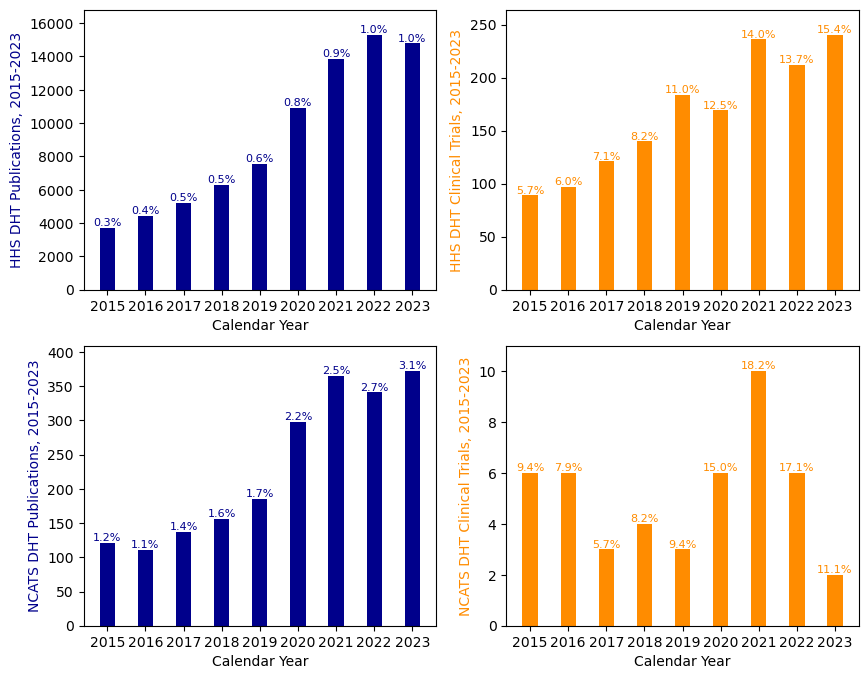

In [136]:
#barplot of all-topic DHT pubs Per Year
fig, ax = plt.subplots(2,2, figsize=(10, 8))
print(len(ax))
# Width of a bar 
width = 0.4 

ax2 = ax[0,1] #.twinx()

vals=pubsByYear['isPubDHT']
x=list(pubsByYear['Pub Year'])[:]
bar1 = ax[0,0].bar(x, vals, width = width,color='darkblue')

#change y limits to give more room:
scale=1.1
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[0,0].set_ylim(min_y_lim, max_y_lim);
#plt.ylim(min_y_lim, max_y_lim)

valsTrials = trialsByYear['isTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
bar2 = ax2.bar(xTrials, valsTrials, width = width,color='darkorange')
#change y limits to give more room:
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
#plt.ylim(min_y_lim, max_y_lim)
ax2.set_ylim(min_y_lim, max_y_lim);


#barerr=2*pubsByYear['isPubDHT']['std'] #1.96*pubsByYear['isPubDHT']['std']/np.sqrt(pubsByYear['Appl ID']['count'])
#plt.errorbar(x=x,y=vals,yerr=barerr, fmt ='o',color='darkblue')
 
#plt.xlabel("Fiscal Year")
#plt.ylabel("DHT Publications, 2015-"+ str(int(endyear)))
ax[0,0].set_ylabel("HHS DHT Publications, 2015-"+ str(int(endyear)),color='darkblue')
ax2.set_ylabel("HHS DHT Clinical Trials, 2015-"+ str(int(endyear)),color='darkorange')
ax[0,0].set_xlabel("Calendar Year")

plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax[0,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax2.set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax2.set_xlabel("Calendar Year")

#text at top of each bar
# Add counts above the two bar graphs
fontsz=8
valsPerc=pubsByYear['percent']
for i, rect in enumerate(bar1):
    ctext=valsPerc[i]
    print(i,ctext)
    ax[0,0].text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=fontsz)


#text at top of each bar
# Add counts above the two bar graphs
valsTrialsPerc=valsTrials/alltrialsByYear['isTrial']*100
for i, rect in enumerate(bar2):
    ctext=valsTrialsPerc[i]
    print(i,ctext)
    ax2.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color = 'darkorange', fontsize=fontsz)

    
#legend:
colors = {'HHS DHT Publications':'darkblue', 'HHS DHT Clinical Trials':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)




#plot only NCATs
vals=pubsByYear['isTrDHT']
x=list(pubsByYear['Pub Year'])[:]
bar3 = ax[1,0].bar(x, vals, width = width,color='darkblue')
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[1,0].set_ylim(min_y_lim, max_y_lim);
ax[1,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

valsTrials = trialsByYear['isTrTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
ax3 = ax[1,1] #.twinx()
bar4 = ax3.bar(xTrials, valsTrials, width = width,color='darkorange')
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
ax3.set_ylim(min_y_lim, max_y_lim);

ax[1,0].set_ylabel("NCATS DHT Publications, 2015-"+ str(int(endyear)),color='darkblue')
ax3.set_ylabel("NCATS DHT Clinical Trials, 2015-"+ str(int(endyear)),color='darkorange')
ax[1,0].set_xlabel("Calendar Year")
ax3.set_xlabel("Calendar Year")


plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

#text at top of each bar
# Add counts above the two bar graphs
fontsz=8
valsPerc=pubsByYear['percentTR']
for i, rect in enumerate(bar3):
    ctext=valsPerc[i]
    print(i,ctext)
    ax[1,0].text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=fontsz)


#text at top of each bar
# Add counts above the two bar graphs
valsTrialsPerc=valsTrials/alltrialsByYear['isTR']*100
for i, rect in enumerate(bar4):
    ctext=valsTrialsPerc[i]
    print(i,ctext)
    ax3.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color = 'darkorange', fontsize=fontsz)

    
#legend:
colors = {'NCATS DHT Publications':'darkblue', 'NCATS DHT Clinical Trials':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)

print('/n==========FIGURE 4===========/n')

plt.show()
fig.figure.savefig(outpath + 'Figure4_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #
fig.set_rasterized(True) #needed to so gray-shading is not interpreted as black when viewing .eps 
fig.figure.savefig(outpath + 'Figure4_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

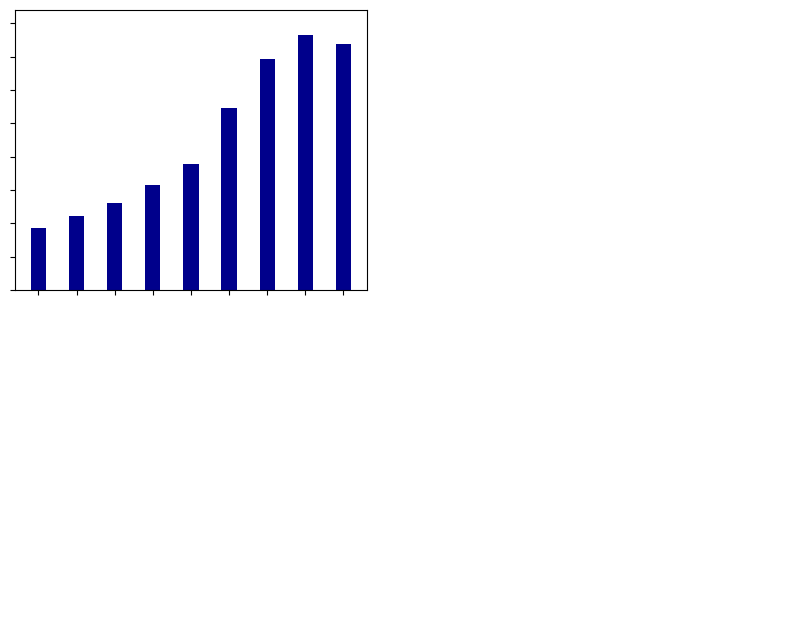

In [137]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(2,2, figsize=(10, 8))
width = 0.4 

vals=pubsByYear['isPubDHT']
x=list(pubsByYear['Pub Year'])[:]
bar1 = ax[0,0].bar(x, vals, width = width,color='darkblue')

#change y limits to give more room:
scale=1.1
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[0,0].set_ylim(min_y_lim, max_y_lim);
ax[0,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax2.set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
#remove extra text
ax[0,0].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[0,0].axes.get_xaxis().set_ticklabels([])
fig.figure.savefig(outpath + 'Figure4a_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #
fig.figure.savefig(outpath + 'Figure4a_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

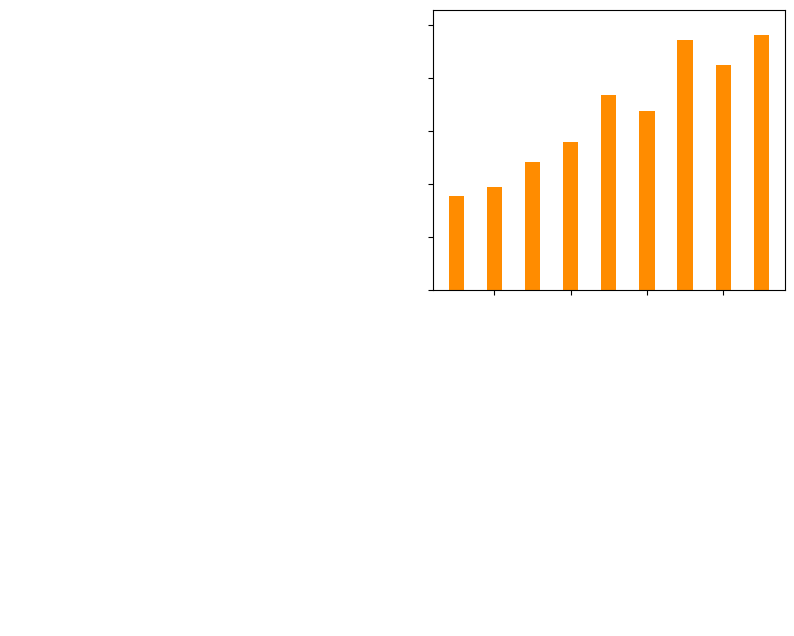

In [138]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(2,2, figsize=(10, 8))

#panel b
ax2 = ax[0,1]
valsTrials = trialsByYear['isTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
bar2 = ax2.bar(xTrials, valsTrials, width = width,color='darkorange')
#change y limits to give more room:
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
#plt.ylim(min_y_lim, max_y_lim)
ax2.set_ylim(min_y_lim, max_y_lim);

ax[0,0].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
#remove extra text
ax2.axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax2.axes.get_xaxis().set_ticklabels([])
fig.figure.savefig(outpath + 'Figure4b_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #
fig.figure.savefig(outpath + 'Figure4b_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

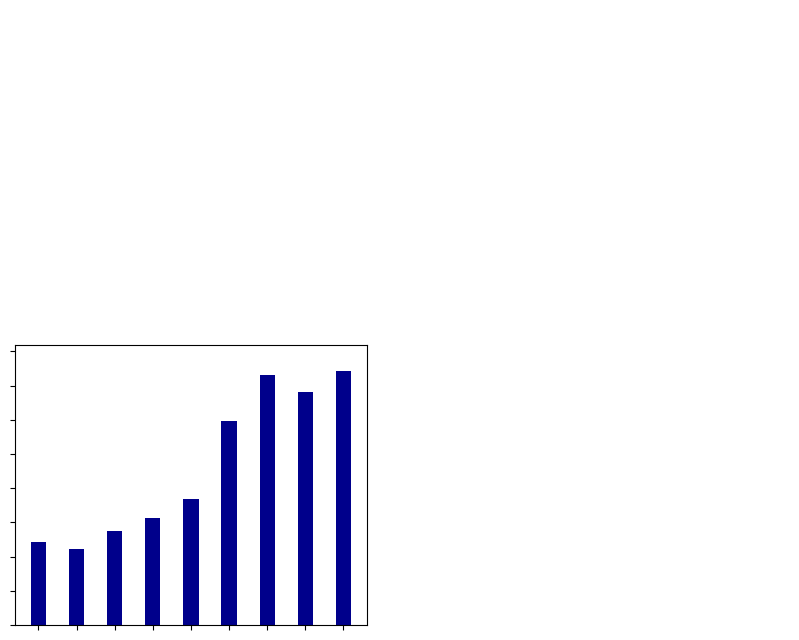

In [139]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(2,2, figsize=(10, 8))

#panel c
#plot only NCATs
vals=pubsByYear['isTrDHT']
x=list(pubsByYear['Pub Year'])[:]
bar3 = ax[1,0].bar(x, vals, width = width,color='darkblue')
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[1,0].set_ylim(min_y_lim, max_y_lim);
ax[1,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,1].axis('off')
#remove extra text
ax[1,0].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[1,0].axes.get_xaxis().set_ticklabels([])
fig.figure.savefig(outpath + 'Figure4c_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #
fig.figure.savefig(outpath + 'Figure4c_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

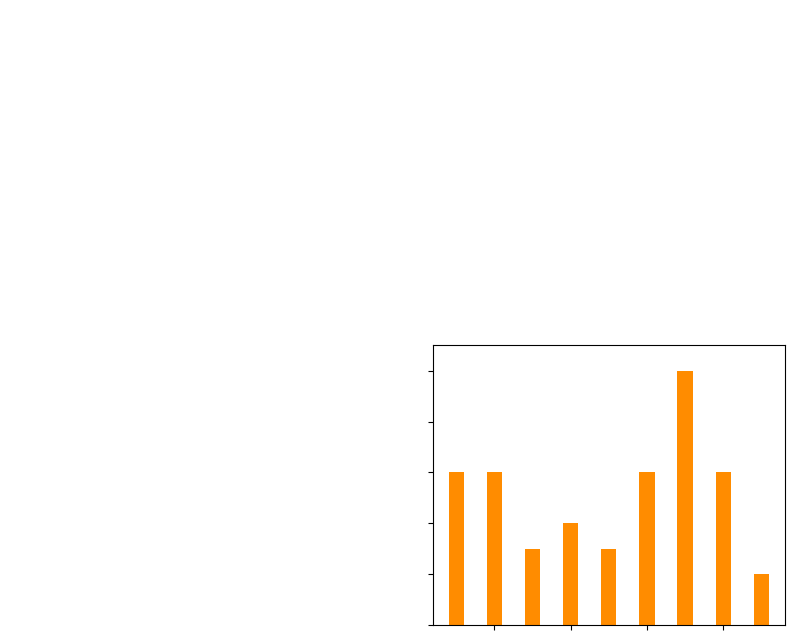

In [140]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(2,2, figsize=(10, 8))

#panel d
valsTrials = trialsByYear['isTrTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
ax3 = ax[1,1] #.twinx()
bar4 = ax3.bar(xTrials, valsTrials, width = width,color='darkorange')
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
ax3.set_ylim(min_y_lim, max_y_lim);

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
#remove extra text
ax3.axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax3.axes.get_xaxis().set_ticklabels([])
fig.figure.savefig(outpath + 'Figure4d_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #
fig.figure.savefig(outpath + 'Figure4d_noText_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

# Supplemental Figure 3. DHT Publications from CTSAs from 2015 – 2023 


In [141]:
#flag NCATS/CTSA DH tpublications in the "allPub" dataframe
pd.options.mode.chained_assignment = None  # default='warn'
df_allPubTR['isCtsa']=0
for i,row in df_allPubTR.iterrows():
    if pd.isna(row['Grant Number']): continue
    isCTSA = ('UL1TR' in row['Grant Number']) or ('U01TR' in row['Grant Number']) 
    if isCTSA: 
        #df_allPubTR['isCtsa'][i]=1
        df_allPubTR.loc[i, "isCtsa"] = 1

In [142]:
#flag NCATS/CTSA DH tpublications in the "allPub" dataframe
pd.options.mode.chained_assignment = None  # default='warn'
df_iPub['isCtsaDHT']=0
for i,row in df_iPub.iterrows():
    if pd.isna(row['Grant Number']): continue
    isCTSA = ('UL1TR' in row['Grant Number']) or ('U01TR' in row['Grant Number']) 
    if isCTSA: 
        #df_iPub['isCtsaDHT'][i]=1
        df_iPub.loc[i,'isCtsaDHT']=1

In [143]:
print('% DHT out of all CTSA publications: ' , df_iPub.isCtsaDHT.sum()/df_allPubTR.isCtsa.sum()*100 )

% DHT out of all CTSA publications:  2.039097119645495


In [144]:
pubsByYearCtsaDht=df_iPub.groupby(['Pub Year'], as_index=False
                                          ).agg({ 'isCtsaDHT':'sum' })
pubsByYearCtsaDht['Pub Year'] = pubsByYearCtsaDht['Pub Year'].astype('int')

In [145]:
pubsByYearCtsaDht

,Pub Year,isCtsaDHT
0,2015,109
1,2016,97
2,2017,114
3,2018,131
4,2019,156
5,2020,259
6,2021,303
7,2022,282
8,2023,316


In [146]:
pubsByYearCtsa=df_allPubTR.groupby(['Pub Year'], as_index=False
                                          ).agg({'isCtsa':'sum' })
pubsByYearCtsa['Pub Year'] = pubsByYearCtsa['Pub Year'].astype('int')

In [147]:
#this needs to be joined by year column........
pubsByYearCtsa = pd.merge(pubsByYearCtsa,pubsByYearCtsaDht,on='Pub Year')
#pubsByYear.drop(['allTopicPubs'], axis=1, inplace=True)
#pubsByYear.rename(columns={"pubs": "allTopicPubs"},inplace=True)

In [148]:
#get percentages:
pubsByYearCtsa['percentDhtPubs'] = pubsByYearCtsa['isCtsaDHT'] / pubsByYearCtsa['isCtsa'] *100

In [149]:
pubsByYearCtsa

,Pub Year,isCtsa,isCtsaDHT,percentDhtPubs
0,2015,9189,109,1.186201
1,2016,8926,97,1.086713
2,2017,8467,114,1.346404
3,2018,7827,131,1.673694
4,2019,9112,156,1.712028
5,2020,10977,259,2.359479
6,2021,12073,303,2.509732
7,2022,10298,282,2.738396
8,2023,9787,316,3.228773


mean =  [196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334, 196.33333333333334]  +/- 56.42588181208695
0 1.1862008923713137
1 1.0867129733363208
2 1.3464036848942955
3 1.6736936246326817
4 1.7120280948200177
5 2.3594789104491207
6 2.509732460863083
7 2.738395805010682
8 3.2287728619597424


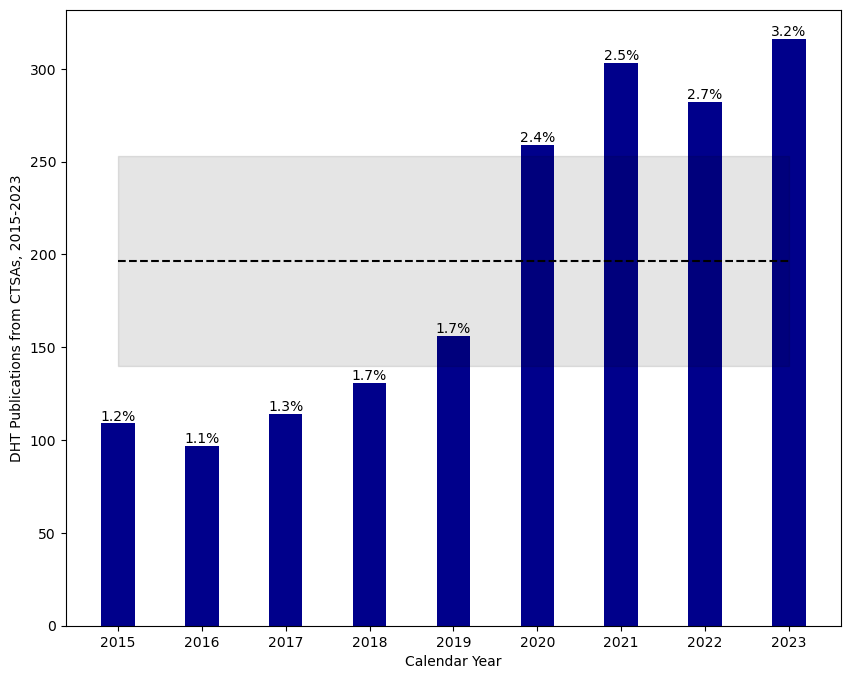

In [150]:
#barplot of DHT pubs Per Year
fig, ax = plt.subplots(1,1, figsize=(10, 8))

valsPerc=pubsByYearCtsa['percentDhtPubs']
vals=pubsByYearCtsa['isCtsaDHT']
x=pubsByYearCtsa['Pub Year'].to_list()
bar1 = plt.bar(x, vals, width = 0.4,color='darkblue')

#barerr=2*pubsByYear['isPubDHT']['std'] #1.96*pubsByYear['isPubDHT']['std']/np.sqrt(pubsByYear['Appl ID']['count'])
#plt.errorbar(x=x,y=vals,yerr=barerr, fmt ='o',color='darkblue')
 
    
plt.xlabel("Calendar Year")
plt.ylabel("DHT Publications from CTSAs, 2015-"+ str(int(endyear)))

#dashed line showing grand mean:
grandmean=[np.mean(vals)]*len(vals)
plt.plot(x, grandmean,color='k',linestyle='--')
ci = 1.96 * np.std(vals)/np.sqrt(len(vals))
plt.fill_between(x, (grandmean-ci), (grandmean+ci), color='k', alpha=.1)
print('mean = ', grandmean, ' +/-', ci)

plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

#text at top of each bar
# Add counts above the two bar graphs
for i, rect in enumerate(bar1):
    ctext=valsPerc[i]
    print(i,ctext)
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom')


plt.show()
fig.figure.savefig(outpath + 'SuppFig3_mHealthPubsAllCTSA_Bar.tiff', dpi=600) #